In [107]:
from utils.ticker_data import get_stock_data
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

c:\Users\borishan\Desktop\ml\code\ml_vs_baseline_reits\utils\ticker_data.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


3809


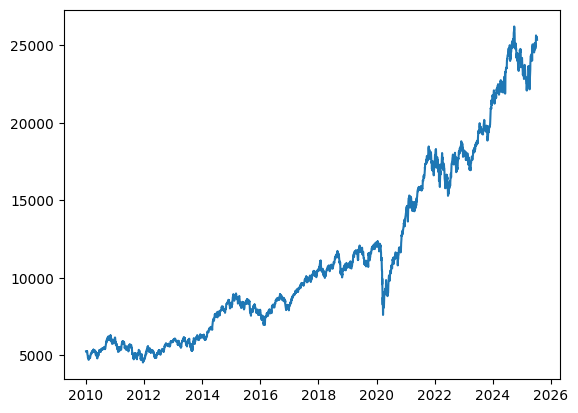

In [108]:
df = get_stock_data("^NSEI", start="2010-01-01")
print(len(df))
plt.plot(df.Date, df.Close)

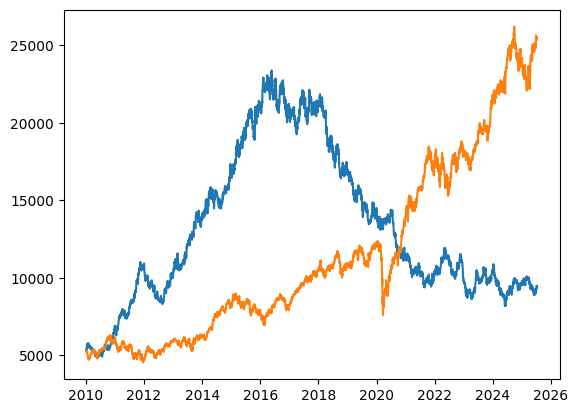

In [ ]:
def gbm_nl(S0, mu, sigma,N,  normal_weight = 0.8, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    dt = 1/N
    z = (stats.laplace.rvs(0,1,N) * (1 - normal_weight) 
         + stats.norm.rvs(0,1,N) * normal_weight)
    z = z / np.sqrt(normal_weight**2 + 2*(1-normal_weight)**2)
    returns = np.exp((mu - 0.5 * sigma**2) * dt + (sigma * np.sqrt(dt) * z))
    
    prices = S0 * np.cumprod(returns)
    return prices

N = len(df)
S0 = df.Close.iloc[0]
mu, sigma = df.logReturns.mean() * N, df.logReturns.std() * np.sqrt(N)

prices = gbm_nl(S0, mu, sigma, N)
plt.plot(df.Date, prices)
plt.plot(df.Date, df.Close)
# plt.plot(df.Date, df.Close)

1.2192244395592255
-0.003272092037928858 0.9831290617703955


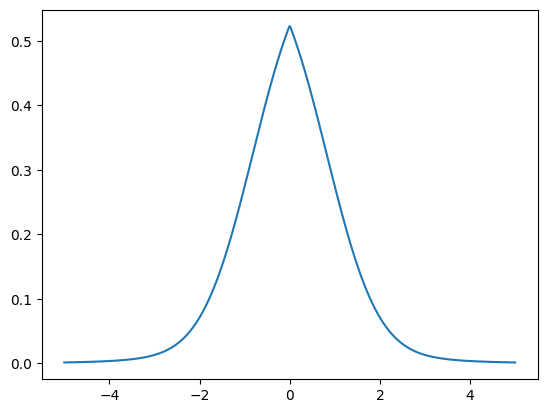

In [110]:
from scipy.integrate import quad

normal_weight = 0.7
variance = np.sqrt(normal_weight**2 + 2*(1-normal_weight)**2)
pdf = lambda x : (stats.laplace.pdf(x, 0,1) * (1 - normal_weight) 
         + stats.norm.pdf(x, 0,1) * normal_weight) / variance
rvs = lambda N : (stats.laplace.rvs(0,1, N) * (1 - normal_weight) 
         + stats.norm.rvs(0,1, N) * normal_weight) / variance
X = np.linspace(-5, 5, 500)
plt.plot(X, pdf(X))
print(quad(pdf, -5, 5)[0])

points = rvs(10000)
print(points.mean(), points.std()**2)

In [ ]:
full_df = get_stock_data("^GSPC", start="2010-01-01")
returns = full_df.logReturns
extreme_returns = returns[np.abs(returns) > 3 * returns.std()]
laplace_fraction = len(extreme_returns) / len(returns)

laplace_fraction
normal_weight = 1 - 1.5 * laplace_fraction 
normal_weight

c:\Users\borishan\Desktop\ml\code\ml_vs_baseline_reits\utils\ticker_data.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


0.9784725781650435